In [2]:
import open3d

ModuleNotFoundError: No module named 'open3d'

In [1]:
!pip install timm==0.6.7

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch

torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo


Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /home/dylaneg/.cache/torch/hub/master.zip


' # This docstring shows up in hub.help()\n    MiDaS DPT_BEiT_L_384 model for monocular depth estimation\n    pretrained (bool): load pretrained weights into model\n    '

In [3]:
model_zoe_n = torch.hub.load("ZoeDepth", "ZoeD_N", source="local", pretrained=True)

img_size [384, 512]


Using cache found in /home/dylaneg/.cache/torch/hub/intel-isl_MiDaS_master
/home/dylaneg/.local/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [4]:
##### sample prediction
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)


# Local file
from PIL import Image
image = Image.open("sample_img.jpg").convert("RGB")  # load
depth_numpy = zoe.infer_pil(image)  # as numpy

depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image

depth_tensor = zoe.infer_pil(image, output_type="tensor")  # as torch tensor

In [24]:
depth_pil.save('sample_depth.png')

In [10]:
print(depth_numpy)

[[3.6984339 3.707071  3.715997  ... 1.7284594 1.7259829 1.7232349]
 [3.7059817 3.714138  3.7225382 ... 1.7293141 1.7268914 1.7243011]
 [3.7135491 3.7212293 3.7290878 ... 1.7302296 1.7277343 1.7250581]
 ...
 [2.4350195 2.4356534 2.4366763 ... 1.8328307 1.8275468 1.8236763]
 [2.4198694 2.4205837 2.421617  ... 1.8303127 1.8253875 1.8218381]
 [2.4041305 2.4048882 2.405883  ... 1.8281186 1.8232985 1.8199551]]


In [13]:
import numpy as np

In [25]:
from zoedepth.utils.misc import get_image_from_url, colorize

In [26]:
print(colorize(depth_numpy))

[[[ 21  21  21 255]
  [ 20  20  20 255]
  [ 18  18  18 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[ 20  20  20 255]
  [ 18  18  18 255]
  [ 17  17  17 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[ 18  18  18 255]
  [ 18  18  18 255]
  [ 17  17  17 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[174 174 174 255]
  [174 174 174 255]
  [174 174 174 255]
  ...
  [247 247 247 255]
  [247 247 247 255]
  [248 248 248 255]]

 [[176 176 176 255]
  [176 176 176 255]
  [176 176 176 255]
  ...
  [247 247 247 255]
  [248 248 248 255]
  [248 248 248 255]]

 [[178 178 178 255]
  [178 178 178 255]
  [177 177 177 255]
  ...
  [247 247 247 255]
  [248 248 248 255]
  [248 248 248 255]]]


In [28]:
depth_img = Image.fromarray(colorize(depth_numpy))

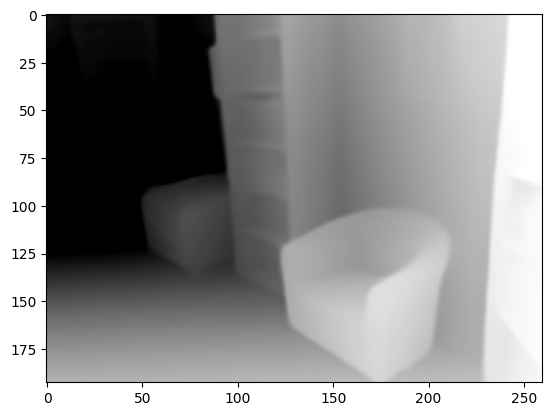

In [29]:
plt.imshow(depth_img)

In [31]:
depth_img.save('sample_depth.png')

In [21]:
print(depth_8)

[[114 123 131 ... 192 189 187]
 [121 130 138 ... 193 190 188]
 [129 137 145 ... 194 191 189]
 ...
 [131 131 132 ...  40  35  31]
 [115 116 117 ...  38  33  29]
 [100 100 101 ...  36  31  27]]


In [22]:
im = Image.fromarray(depth_8)

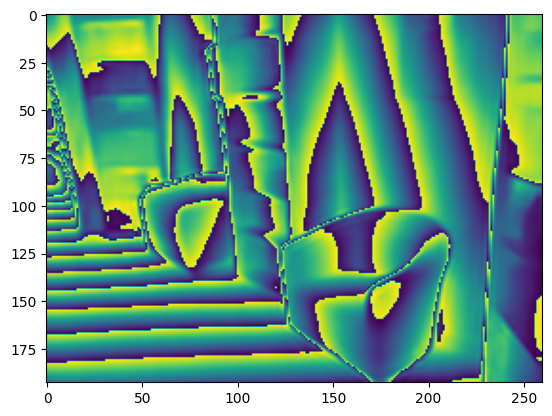

In [23]:
plt.imshow(im)

In [5]:
depth_pil.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/dylaneg/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [6]:
import matplotlib.pyplot as plt

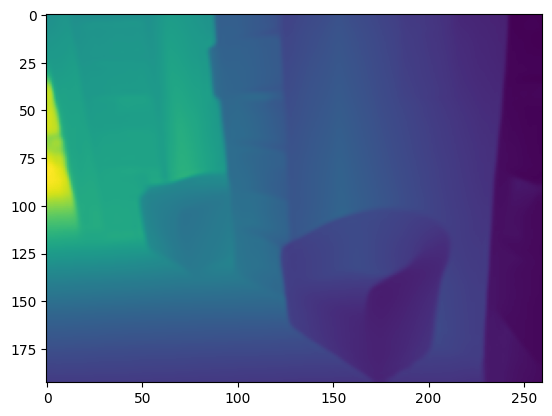

In [7]:
plt.imshow(depth_pil)

In [9]:
print(depth_numpy.shape)

(193, 260)


In [33]:
depth_numpy = depth_numpy.astype(np.uint16)
depth_o3d = o3d.geometry.Image(depth_numpy) # Convert to open3d image

NameError: name 'o3d' is not defined